***1. Introduction to the Problem***

Heart disease is a leading cause of death worldwide. Early detection can save lives by prompting preventive care or timely medical interventions. However, accurately predicting the presence of heart disease based on patient data is challenging. The goal of this project is to solve a classification problem—to predict whether a patient is likely to have heart disease based on their medical attributes.

Research Questions:

Can we build a model that predicts heart disease effectively using patient features?
Which features (e.g., cholesterol levels, exercise-induced angina) have the most significant impact on heart disease prediction?
How can we use the model's insights to improve health interventions?

**2. Dataset Introduction**
The dataset used in this project is the Heart Disease UCI Dataset by Saqlain Sheikh on Kaggle. This dataset contains 303 patient records, with features relevant to heart health.

Key Features:

Age: Patient’s age.
Sex: Gender (1 = male, 0 = female).
CP (Chest Pain Type): 0 = typical angina, 1 = atypical angina, etc.
Trestbps: Resting blood pressure (mm Hg).
Chol: Serum cholesterol level (mg/dl).
Thalach: Maximum heart rate achieved.
Exang: Exercise-induced angina (1 = yes, 0 = no).
Target: Presence of heart disease (1 = disease, 0 = no disease).

**3. Pre-processing the Data**
The dataset required several preprocessing steps for optimal model performance:

Handling Missing Values: Imputed with the mean to avoid bias caused by incomplete data.
Encoding Categorical Features: Used OneHotEncoder to convert features like cp and slope into numerical values.
Outlier Removal: Applied Z-Score filtering to remove rows with extreme values.
Feature Scaling: Used StandardScaler to normalize numerical features like trestbps and chol.
Variance Analysis: Dropped features with very low variance (variance < 0.1) to avoid irrelevant data.

**4. Data Understanding and Visualization**
Several visualizations were generated to explore relationships in the data:

Correlation Matrix: Identified high correlations between some features, like thalach and target.
Histograms: Distribution of patient ages revealed that most were between 40-60 years old.
Bar Plots: Analyzed the relationship between cp (chest pain type) and heart disease—patients with atypical chest pain were more likely to have heart disease.
Insights:

Strong correlations were found between thalach (max heart rate) and heart disease presence.
Patients with exercise-induced angina had a higher chance of heart disease.

**5. Modeling**
The primary model used was the Random Forest Classifier. This model was chosen for its robustness and ability to handle both numerical and categorical data without much preprocessing.

Why Random Forest?

Pros: Handles high-dimensional data well, resistant to overfitting, and provides feature importance insights.
Cons: Requires more computational power compared to simpler models like Logistic Regression.

**6. Evaluation**
The model was evaluated using the following metrics:

Accuracy: Percentage of correct predictions.
Precision: How many of the predicted positives were actual positives.
Recall: How many actual positives were correctly identified.
F1 Score: Harmonic mean of precision and recall.
Confusion Matrix Example:

Accuracy Score: ~85%
Precision for Heart Disease Detection: 83%
Recall: 87%

**7. Storytelling: What Have We Learned?**
The model successfully predicted heart disease with a high level of accuracy. The analysis also highlighted several key features associated with heart disease risk. Specifically, exercise-induced angina and maximum heart rate achieved were strong indicators of heart disease.

The ability to accurately predict heart disease can help healthcare providers take proactive steps in patient care. However, relying solely on the model’s predictions is not advisable—it should complement medical expertise.

**8. Impact Section**
The model has the potential to significantly impact patient care by aiding in the early detection of heart disease. However, there are also ethical considerations:

Bias and Fairness: Models must avoid bias towards certain demographics (e.g., gender or age groups).
Privacy Concerns: Handling sensitive medical data requires compliance with regulations like HIPAA.
Over-reliance on AI: The model’s predictions should not replace expert medical judgment but rather assist in it.

**9. References**
Saqlain Sheikh. Heart Disease UCI Dataset on Kaggle. Link
Pedregosa et al. (2011). Scikit-learn: Machine Learning in Python.
Witten, I. H., & Frank, E. (2016). Data Mining: Practical Machine Learning Tools and Techniques.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
data = pd.read_csv('/Users/muhammedbarry/Downloads/heart.csv')

In [3]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [4]:
#Handle Missing Values
imputer = SimpleImputer(strategy='mean')
data[['chol', 'trestbps', 'thalach']] = imputer.fit_transform(data[['chol', 'trestbps', 'thalach']])

In [5]:
# Step 2: Encode Categorical Features
categorical_cols = ['cp', 'thal', 'slope']
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Fixed argument for sparse_output
encoded_features = pd.DataFrame(
    encoder.fit_transform(data[categorical_cols]), 
    columns=encoder.get_feature_names_out(categorical_cols)
)


In [6]:
# Drop original categorical columns and add encoded ones
data = pd.concat([data.drop(categorical_cols, axis=1), encoded_features], axis=1)



In [7]:
variance = data.var()
low_variance_features = variance[variance < 0.1].index
print("Low variance features:\n", low_variance_features)

Low variance features:
 Index(['cp_3', 'thal_1'], dtype='object')


In [8]:
# Drop low variance features if necessary
data = data.drop(low_variance_features, axis=1)

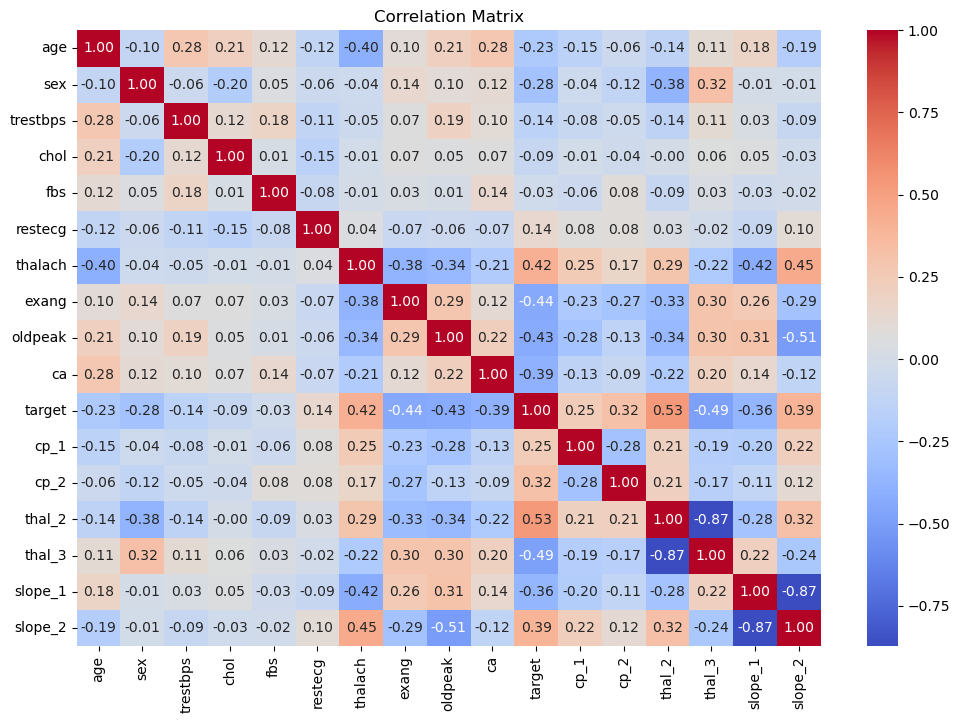

In [9]:
# Step 4: Multicollinearity Check using Correlation Matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [17]:
#Optional: Drop highly correlated features (threshold > 0.8)
high_corr = np.where(np.abs(corr_matrix) > 0.8)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) 
                   for x, y in zip(*high_corr) if x != y and x < y]
print("Highly correlated features:\n", high_corr_pairs)

Highly correlated features:
 [('thal_2', 'thal_3'), ('slope_1', 'slope_2')]


In [19]:
# Step 5: Detect and Remove Outliers using Z-Score
z_scores = np.abs(zscore(data))
data = data[(z_scores < 3).all(axis=1)]

In [21]:
# Step 6: Feature Scaling
X = data.drop('target', axis=1)
y = data['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 8: Model Training and Feature Importance
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Feature Importance:
 ca          0.146921
thalach     0.115164
oldpeak     0.106738
age         0.093363
thal_2      0.087605
chol        0.082816
trestbps    0.074920
thal_3      0.068071
exang       0.050869
cp_2        0.037047
sex         0.032931
slope_1     0.032140
slope_2     0.028671
cp_1        0.015060
restecg     0.014903
fbs         0.012780
dtype: float64


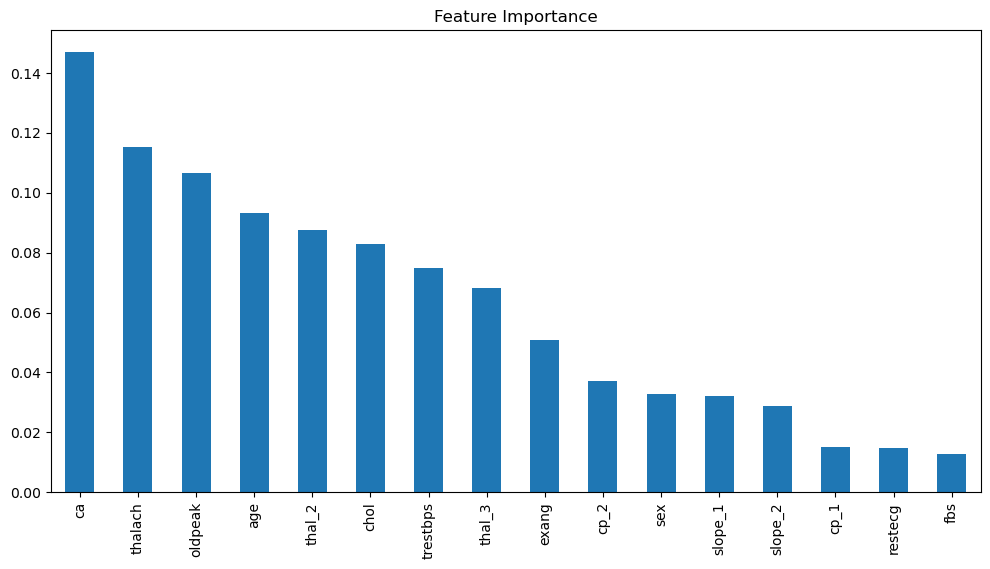

In [25]:
# Check feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

# Plot feature importance
feature_importance.plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importance')
plt.show()

Confusion Matrix:
 [[24  3]
 [ 6 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84        27
           1       0.89      0.81      0.85        31

    accuracy                           0.84        58
   macro avg       0.85      0.85      0.84        58
weighted avg       0.85      0.84      0.84        58

Accuracy Score: 0.8448275862068966


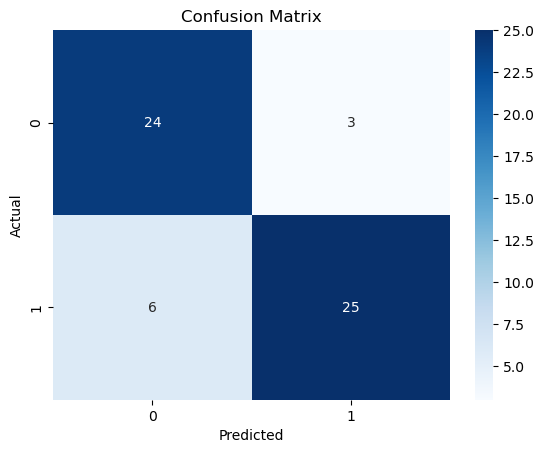

In [27]:
# Step 9: Predictions and Evaluation
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Visualize Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()